-----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

# Introduccion del proyecto
En este pryecto vamos a revisar una muestra de usuarios que utilizan planes de telefonia diferentes, el objetivo sera comparar ambos planes y ver cual es el mejor entre ellos. Se utilizaran diferentes tipos de data frame que contienen datos importantes sobre los usuarios y el manejo de los planes;  los cuales se examinaran a detalle y se identificaran errores que puedan dificultar el analisis de los datos. Posteriormente se realizaran calculos matematicos y graficos para interpretar como es que se comportan ambas muestras, y a partir de ahi realizaremos hipotesis que responderan nuestra principal cuestion, que es saber cual de los 2 planes es mas conveniente para los usuarios.

## Inicialización

In [1]:
# Cargar librerías necesarias para análisis y visualización
import pandas as pd             # para trabajar con dataframes
import numpy as np              # para cálculos matemáticos y estadísticas básicas
import matplotlib.pyplot as plt # para gráficos estáticos
import seaborn as sns           # para gráficos avanzados

from scipy import stats as st   # para pruebas estadísticas
from datetime import datetime   # para trabajar con fechas


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
# Cargar los archivos CSV en diferentes DataFrames
calls     = pd.read_csv('../data/megaline_calls.csv')
internet  = pd.read_csv('../data/megaline_internet.csv')
messages  = pd.read_csv('../data/megaline_messages.csv')
plans     = pd.read_csv('../data/megaline_plans.csv')
users     = pd.read_csv('../data/megaline_users.csv')


In [3]:
for name, df in [
    ("calls", calls),
    ("internet", internet),
    ("messages", messages),
    ("plans", plans),
    ("users", users),
]:
    print(name, df.shape)
    display(df.head(3))


calls (137735, 4)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48


internet (104825, 4)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40


messages (76051, 3)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31


plans (2, 8)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


users (500, 8)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans.info())
print(plans.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000        

In [4]:
# Imprime una muestra de los datos para las tarifas
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


A simple vista, el data frame plans no ofrece algun error llamativo, si no es una comparacion de ambos planes y lo que ofrece cada uno. No obstante, por instrucciones, redondearemos los floats ylos convertiremos en enteros para que representen minutos 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
plans.columns = plans.columns.str.replace('_', ' ')
print(plans.head())


   messages included  mb per month included  minutes included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd monthly pay  usd per gb  usd per message  usd per minute plan name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Enriquecer los datos

No considero que haya manera de hacer enriquecer los datos, se me vino a la mente hacer la conversion en la columna de mb per month included de los mega bytes a GB pero no lo considero muy necesario, por lo tanto solo lo hice por enriquecer los datos 

In [6]:
plans.rename(columns={'mb per month included': 'gb per month included'}, inplace=True)
plans['gb per month included'] = plans['gb per month included'] / 1024

In [7]:
print(plans.head())

   messages included  gb per month included  minutes included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd monthly pay  usd per gb  usd per message  usd per minute plan name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Usuarios/as

In [8]:
# Información general de los usuarios
print(users.info())

# Estadísticas descriptivas básicas
print(users.describe(include='all'))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
            user_id first_name  last_name         age  \
count    500.000000        500        500  500.000000   
unique          NaN        458        399         NaN   
top             NaN    Seymour  Wilkinson         NaN   
freq            NaN          3          3         NaN   
mean    1249.500000        NaN        NaN   45.486000   
std      144.481833        NaN        NaN   16.972269   
min     1000.000000        NaN        NaN

In [9]:
# Imprime una muestra de datos para usuarios
print(users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Hay muchos datos ausentes en la columna churn date, que es la columna que representa la fecha en la que el usuario dejo de usar el servicio, no obstante, si no tiene fecha es por que el usuario seguia usando el servicio al momento que fue sustraido este data frame, por lo tanto, al ver que solo 34 celdas tienen ese dato, eliminare la columna, por que tampoco la puedo llenar con otros datos, ya que modficaria completamente el data frame y la informacion que respresenta. Asi mismo cambiaremos la columna reg_date a date time

### Corregir los datos

Modificaremos las columnas eliminando los guiones bajos para agilizar el si las llamamos

In [10]:
users.columns = users.columns.str.replace('_', ' ')
users['reg date'] = pd.to_datetime(users['reg date'])

### Enriquecer los datos

Eliminaremos la columna churn_date ya que son muy pocos los datos que tiene, ademas de que si llenamos la informacion con otra adicional no serviria de nada

In [11]:
users.drop(columns='churn date', inplace=True)

In [12]:
print(users.head())

   user id first name  last name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg date      plan  
0 2018-12-24  ultimate  
1 2018-08-13      surf  
2 2018-10-21      surf  
3 2018-01-28      surf  
4 2018-05-23      surf  


## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
# Información general del DataFrame
print(calls.info())
print()  # Línea en blanco para legibilidad

# Estadísticas descriptivas
print(calls.describe())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000



In [14]:
# Imprime una muestra de datos para las llamadas
print(calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Vamos a cambiar el nombre de las columnas eliminando los guiones bajos de nuevo, de igual manera en la columna duration, vamos a redondear los segundos a minutos, para que solo sean enteros. de igual manera vamos a eliminar los guiones bajos de id para que sea mas facil buscarlos y modificar la columna call_date de object a datetime. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
# 1. Eliminar guiones bajos en los nombres de columnas y reemplazarlos por espacios
calls.columns = [col.replace('_', ' ') for col in calls.columns]

# 2. Eliminar guiones bajos en los valores de la columna 'id'
calls['id'] = calls['id'].str.replace('_', '', regex=False)

calls['call date'] = pd.to_datetime(calls['call date'])
print(calls.head())


        id  user id  call date  duration
0   100093     1000 2018-12-27      8.52
1  1000145     1000 2018-12-27     13.66
2  1000247     1000 2018-12-27     14.48
3  1000309     1000 2018-12-28      5.76
4  1000380     1000 2018-12-30      4.22


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [16]:
# Redondear la duración hacia arriba al entero más cercano
calls['duration'] = np.ceil(calls['duration']).astype(int)
print(calls.head())
calls.dtypes


        id  user id  call date  duration
0   100093     1000 2018-12-27         9
1  1000145     1000 2018-12-27        14
2  1000247     1000 2018-12-27        15
3  1000309     1000 2018-12-28         6
4  1000380     1000 2018-12-30         5


id                   object
user id               int64
call date    datetime64[ns]
duration              int64
dtype: object

## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

# Estadísticas descriptivas si hay columnas numéricas
print(messages.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [18]:
# Imprime una muestra de datos para los mensajes
print(messages.head())


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Cambiare la columna message_date de object a date time y de nuevo el nombre de las columnas y eliminare el guion bajo de los datos de la columna id,para que sea mas facil buscarlos 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
# Reemplazar guiones bajos por espacios en los nombres de las columnas
messages.columns = messages.columns.str.replace('_', ' ')
messages['message date'] = pd.to_datetime(messages['message date'])


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [20]:
messages['id'] = messages['id'].str.replace('_', '', regex=False).str.replace(' ', '', regex=False)
print(messages.head())


        id  user id message date
0  1000125     1000   2018-12-27
1  1000160     1000   2018-12-31
2  1000223     1000   2018-12-31
3  1000251     1000   2018-12-27
4  1000255     1000   2018-12-26


## Internet

In [21]:
# Imprime la información general/resumida sobre el DataFrame de internet
# Información general del DataFrame de internet
print(internet.info())

# Estadísticas resumidas
print(internet.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


In [22]:
# Muestra de los primeros registros
print(internet.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


A simple revision de nuevo cambiar la columna session_date de object a date time, y por mejorar diccion, eliminar los guiones bajos; planeaba cambiar de mega byte a gyga byte, pero creo que aqui no serviria de mucho

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [23]:
internet.columns = internet.columns.str.replace('_', ' ')
internet['session date'] = pd.to_datetime(internet['session date'])


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [24]:
internet['id'] = internet['id'].str.replace(r'[_\s]+', '', regex=True)
print(internet.head())


        id  user id session date  mb used
0   100013     1000   2018-12-29    89.86
1  1000204     1000   2018-12-31     0.00
2  1000379     1000   2018-12-28   660.40
3  1000413     1000   2018-12-26   270.99
4  1000442     1000   2018-12-27   880.22


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [25]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)


   messages included  gb per month included  minutes included  \
0                 50                   15.0               500   
1               1000                   30.0              3000   

   usd monthly pay  usd per gb  usd per message  usd per minute plan name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  



Al revisar la tabla de tarifas, se pueden observar dos planes con características distintas.

El plan Surf cuesta 20 dólares al mes e incluye 500 minutos, 50 SMS y 15 GB de datos. Si se exceden esos límites, cada minuto adicional cuesta 3 centavos, cada SMS adicional también cuesta 3 centavos, y cada GB extra cuesta 10 dólares.

Por otro lado, el plan Ultimate cuesta 70 dólares al mes, pero ofrece mucho más: 3000 minutos, 1000 SMS y 30 GB de datos. Si el usuario se pasa de esos límites, cada minuto extra cuesta solo 1 centavo, cada SMS extra también 1 centavo, y cada GB adicional cuesta 7 dólares.

En resumen, Surf es una opción más económica pensada para quienes no usan tanto el servicio, mientras que Ultimate está enfocado en usuarios que consumen más y podrían beneficiarse de límites más altos y excedentes más baratos.

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [26]:
# Crear una nueva columna 'month' a partir de 'call date'
calls['month'] = calls['call date'].dt.to_period('M')

# Agrupar por usuario y mes, y contar llamadas
calls_per_month = calls.groupby(['user id', 'month'])['id'].count().reset_index()

# Renombrar la columna de conteo
calls_per_month.rename(columns={'id': 'calls made'}, inplace=True)

# Mostrar resultado
print(calls_per_month.head(20))



    user id    month  calls made
0      1000  2018-12          16
1      1001  2018-08          27
2      1001  2018-09          49
3      1001  2018-10          65
4      1001  2018-11          64
5      1001  2018-12          56
6      1002  2018-10          11
7      1002  2018-11          55
8      1002  2018-12          47
9      1003  2018-12         149
10     1004  2018-05          21
11     1004  2018-06          44
12     1004  2018-07          49
13     1004  2018-08          49
14     1004  2018-09          42
15     1004  2018-10          61
16     1004  2018-11          54
17     1004  2018-12          50
18     1005  2018-12          59
19     1006  2018-11           2


In [27]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Asegurarse de que hay una columna de mes
calls['month'] = calls['call date'].dt.to_period('M')

# Agrupar por usuario y mes, y sumar la duración total
minutes_per_month = calls.groupby(['user id', 'month'])['duration'].sum().reset_index()

# Renombrar la columna para mayor claridad
minutes_per_month.rename(columns={'duration': 'minutes used'}, inplace=True)

# Mostrar una muestra del resultado
print(minutes_per_month.head(20))



    user id    month  minutes used
0      1000  2018-12           124
1      1001  2018-08           182
2      1001  2018-09           315
3      1001  2018-10           393
4      1001  2018-11           426
5      1001  2018-12           412
6      1002  2018-10            59
7      1002  2018-11           386
8      1002  2018-12           384
9      1003  2018-12          1104
10     1004  2018-05           193
11     1004  2018-06           275
12     1004  2018-07           381
13     1004  2018-08           354
14     1004  2018-09           301
15     1004  2018-10           365
16     1004  2018-11           476
17     1004  2018-12           427
18     1005  2018-12           496
19     1006  2018-11            10


In [28]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Asegurarse de que hay una columna de mes
messages['month'] = messages['message date'].dt.to_period('M')

# Agrupar por usuario y mes, y contar los mensajes
messages_per_month = messages.groupby(['user id', 'month'])['id'].count().reset_index()

# Renombrar la columna para mayor claridad
messages_per_month.rename(columns={'id': 'messages sent'}, inplace=True)

# Mostrar una muestra del resultado
print(messages_per_month.head(20))



    user id    month  messages sent
0      1000  2018-12             11
1      1001  2018-08             30
2      1001  2018-09             44
3      1001  2018-10             53
4      1001  2018-11             36
5      1001  2018-12             44
6      1002  2018-10             15
7      1002  2018-11             32
8      1002  2018-12             41
9      1003  2018-12             50
10     1004  2018-05              7
11     1004  2018-06             18
12     1004  2018-07             26
13     1004  2018-08             25
14     1004  2018-09             21
15     1004  2018-10             24
16     1004  2018-11             25
17     1004  2018-12             31
18     1005  2018-12             11
19     1006  2018-11             15


In [29]:
# Crear la columna del mes
internet['month'] = internet['session date'].dt.to_period('M')

# Agrupar por usuario y mes, sumando el tráfico en megabytes
internet_per_month = internet.groupby(['user id', 'month'])['mb used'].sum().reset_index()

# Renombrar la columna de 'mb used' a 'gb used'
internet_per_month.rename(columns={'mb used': 'gb used'}, inplace=True)

# Convertir los datos a GB y redondear hacia arriba
internet_per_month['gb used'] = (internet_per_month['gb used'] / 1024).apply(np.ceil)

# Mostrar el resultado
print(internet_per_month.head(20))



    user id    month  gb used
0      1000  2018-12      2.0
1      1001  2018-08      7.0
2      1001  2018-09     14.0
3      1001  2018-10     22.0
4      1001  2018-11     19.0
5      1001  2018-12     19.0
6      1002  2018-10      7.0
7      1002  2018-11     19.0
8      1002  2018-12     15.0
9      1003  2018-12     27.0
10     1004  2018-05      7.0
11     1004  2018-06     21.0
12     1004  2018-07     24.0
13     1004  2018-08     28.0
14     1004  2018-09     19.0
15     1004  2018-10     15.0
16     1004  2018-11     22.0
17     1004  2018-12     21.0
18     1005  2018-12     17.0
19     1006  2018-11      3.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [30]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Fusionar llamadas con minutos
calls_data = calls_per_month.merge(minutes_per_month, on=['user id', 'month'], how='outer')

# Fusionar con mensajes
calls_messages_data = calls_data.merge(messages_per_month, on=['user id', 'month'], how='outer')

# Fusionar con internet
usage_data = calls_messages_data.merge(internet_per_month, on=['user id', 'month'], how='outer')

# Revisar el resultado
print(usage_data.head(20))



    user id    month  calls made  minutes used  messages sent  gb used
0      1000  2018-12        16.0         124.0           11.0      2.0
1      1001  2018-08        27.0         182.0           30.0      7.0
2      1001  2018-09        49.0         315.0           44.0     14.0
3      1001  2018-10        65.0         393.0           53.0     22.0
4      1001  2018-11        64.0         426.0           36.0     19.0
5      1001  2018-12        56.0         412.0           44.0     19.0
6      1002  2018-10        11.0          59.0           15.0      7.0
7      1002  2018-11        55.0         386.0           32.0     19.0
8      1002  2018-12        47.0         384.0           41.0     15.0
9      1003  2018-12       149.0        1104.0           50.0     27.0
10     1004  2018-05        21.0         193.0            7.0      7.0
11     1004  2018-06        44.0         275.0           18.0     21.0
12     1004  2018-07        49.0         381.0           26.0     24.0
13    

In [31]:
# Añade la información de la tarifa
# Primero, unimos users con plans para tener los detalles de tarifa por usuario
users_with_plans = users.merge(plans, left_on='plan', right_on='plan name', how='left')

# Luego, unimos esa información con usage_data por 'user id'
usage_data = usage_data.merge(users_with_plans[['user id', 'plan', 'usd monthly pay',
                                                'minutes included', 'messages included',
                                                'gb per month included',
                                                'usd per minute', 'usd per message', 'usd per gb']],
                              on='user id', how='left')

print(usage_data.head(20))

    user id    month  calls made  minutes used  messages sent  gb used  \
0      1000  2018-12        16.0         124.0           11.0      2.0   
1      1001  2018-08        27.0         182.0           30.0      7.0   
2      1001  2018-09        49.0         315.0           44.0     14.0   
3      1001  2018-10        65.0         393.0           53.0     22.0   
4      1001  2018-11        64.0         426.0           36.0     19.0   
5      1001  2018-12        56.0         412.0           44.0     19.0   
6      1002  2018-10        11.0          59.0           15.0      7.0   
7      1002  2018-11        55.0         386.0           32.0     19.0   
8      1002  2018-12        47.0         384.0           41.0     15.0   
9      1003  2018-12       149.0        1104.0           50.0     27.0   
10     1004  2018-05        21.0         193.0            7.0      7.0   
11     1004  2018-06        44.0         275.0           18.0     21.0   
12     1004  2018-07        49.0      

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [32]:
print(usage_data.columns.tolist())

['user id', 'month', 'calls made', 'minutes used', 'messages sent', 'gb used', 'plan', 'usd monthly pay', 'minutes included', 'messages included', 'gb per month included', 'usd per minute', 'usd per message', 'usd per gb']


In [33]:
def calcular_ingresos(row):
    extra_minutes = max(0, row['minutes used'] - row['minutes included'])
    extra_messages = max(0, row['messages sent'] - row['messages included'])
    extra_gb = max(0, row['gb used'] - row['gb per month included'])

    charges = (extra_minutes * row['usd per minute'] +
               extra_messages * row['usd per message'] +
               extra_gb * row['usd per gb'])

    return row['usd monthly pay'] + charges

usage_data['total monthly revenue'] = usage_data.apply(calcular_ingresos, axis=1)

print(usage_data[['user id', 'month', 'plan', 'total monthly revenue']].head(30))



    user id    month      plan  total monthly revenue
0      1000  2018-12  ultimate                  70.00
1      1001  2018-08      surf                  20.00
2      1001  2018-09      surf                  20.00
3      1001  2018-10      surf                  90.09
4      1001  2018-11      surf                  60.00
5      1001  2018-12      surf                  60.00
6      1002  2018-10      surf                  20.00
7      1002  2018-11      surf                  60.00
8      1002  2018-12      surf                  20.00
9      1003  2018-12      surf                 158.12
10     1004  2018-05      surf                  20.00
11     1004  2018-06      surf                  80.00
12     1004  2018-07      surf                 110.00
13     1004  2018-08      surf                 150.00
14     1004  2018-09      surf                  60.00
15     1004  2018-10      surf                  20.00
16     1004  2018-11      surf                  90.00
17     1004  2018-12      su

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

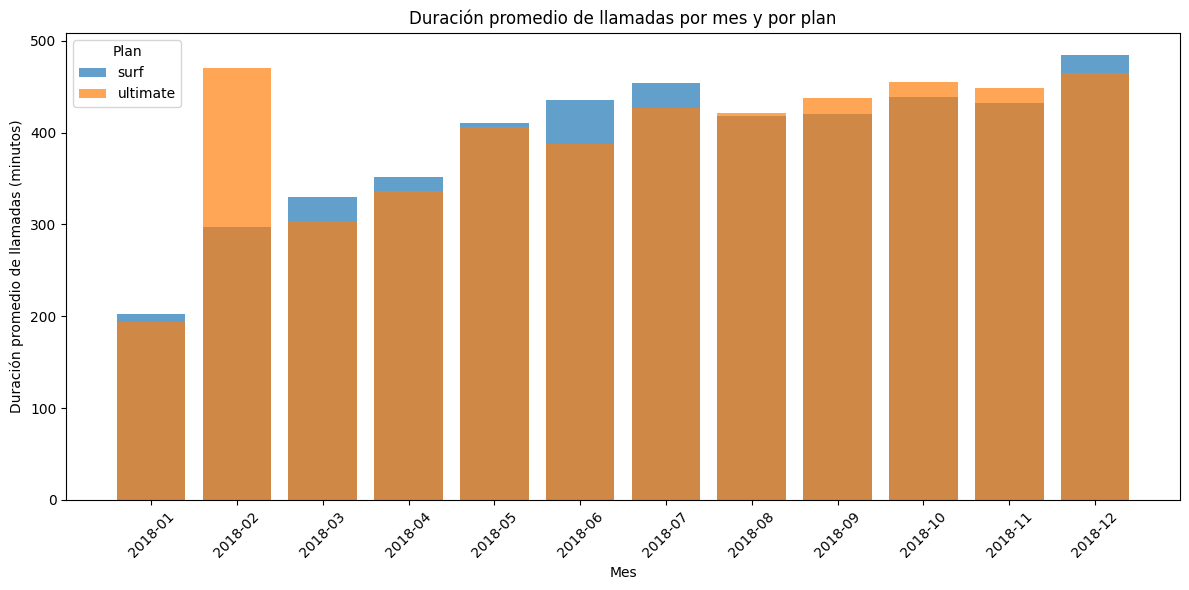

In [34]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Agrupar por mes y plan, y calcular la duración promedio de llamadas
avg_call_duration = usage_data.groupby(['month', 'plan'])['minutes used'].mean().reset_index()

# Convertir periodo a string para que se vea mejor en el gráfico
avg_call_duration['month'] = avg_call_duration['month'].astype(str)

# Graficar
plt.figure(figsize=(12, 6))
for plan in avg_call_duration['plan'].unique():
    subset = avg_call_duration[avg_call_duration['plan'] == plan]
    plt.bar(subset['month'], subset['minutes used'], label=plan, alpha=0.7)

plt.title('Duración promedio de llamadas por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


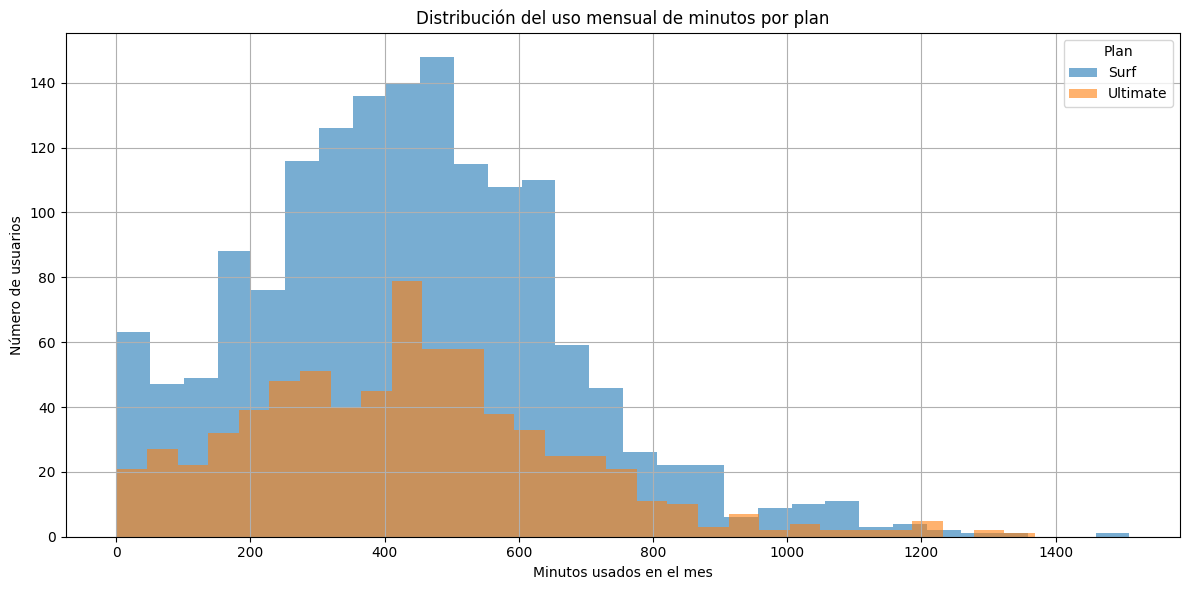

In [35]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
import matplotlib.pyplot as plt

# Crear histogramas para cada plan
plt.figure(figsize=(12, 6))

# Filtrar por cada plan
surf_minutes = usage_data[usage_data['plan'] == 'surf']['minutes used']
ultimate_minutes = usage_data[usage_data['plan'] == 'ultimate']['minutes used']

# Histograma
plt.hist(surf_minutes, bins=30, alpha=0.6, label='Surf')
plt.hist(ultimate_minutes, bins=30, alpha=0.6, label='Ultimate')

plt.title('Distribución del uso mensual de minutos por plan')
plt.xlabel('Minutos usados en el mes')
plt.ylabel('Número de usuarios')
plt.legend(title='Plan')
plt.grid(True)
plt.tight_layout()
plt.show()



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [36]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Agrupar por plan y calcular estadísticas de minutos usados
call_stats = usage_data.groupby('plan')['minutes used'].agg(['mean', 'var']).reset_index()

# Mostrar los resultados
print(call_stats)



       plan        mean           var
0      surf  436.519741  52571.063243
1  ultimate  434.676017  56573.632247


<Figure size 1000x600 with 0 Axes>

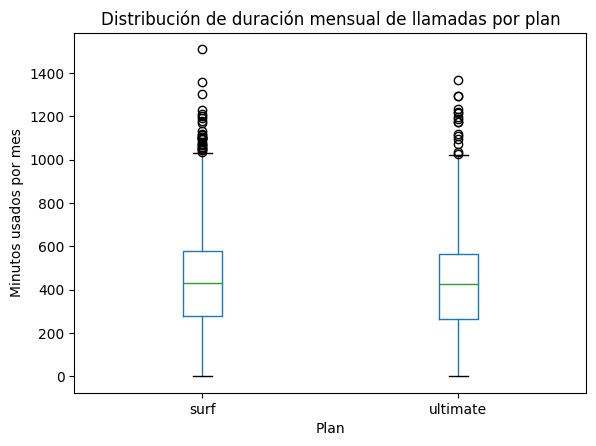

In [37]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import matplotlib.pyplot as plt

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
usage_data.boxplot(column='minutes used', by='plan', grid=False)

# Ajustar etiquetas y título
plt.title('Distribución de duración mensual de llamadas por plan')
plt.suptitle('')  # Elimina el título automático
plt.xlabel('Plan')
plt.ylabel('Minutos usados por mes')
plt.show()



Podemos observar que el compartamiento de la duracion de llamadas en ambos planes es sumamente parecido. Se puede inferir que la mayoria de clientes en promedio usa entre 300 y 600 minutos, no obstante, vemos que el plan surf tiene mas datos atipicos que ultimate, lo cual soreprende por que si recordamos el plan de surf, solo permite 500 minutos al mes, y ultimate 3000 minutos. Partiendo de ese ultimo comentario, podria decir que los usuarios de surf en muchas ocasiones sobrepasan su plan y pagan mas extras, y los usuarios de ultimate pagan mas de mensualidad, pero se podria desperdician sus beneficios y no sacan buen provecho 

### Mensajes

In [38]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Media de mensajes enviados por plan (redondeada)
mean_messages = usage_data.groupby('plan')['messages sent'].mean().round()
print("Media de mensajes enviados por plan (redondeada):")
print(mean_messages)


Media de mensajes enviados por plan (redondeada):
plan
surf        40.0
ultimate    46.0
Name: messages sent, dtype: float64


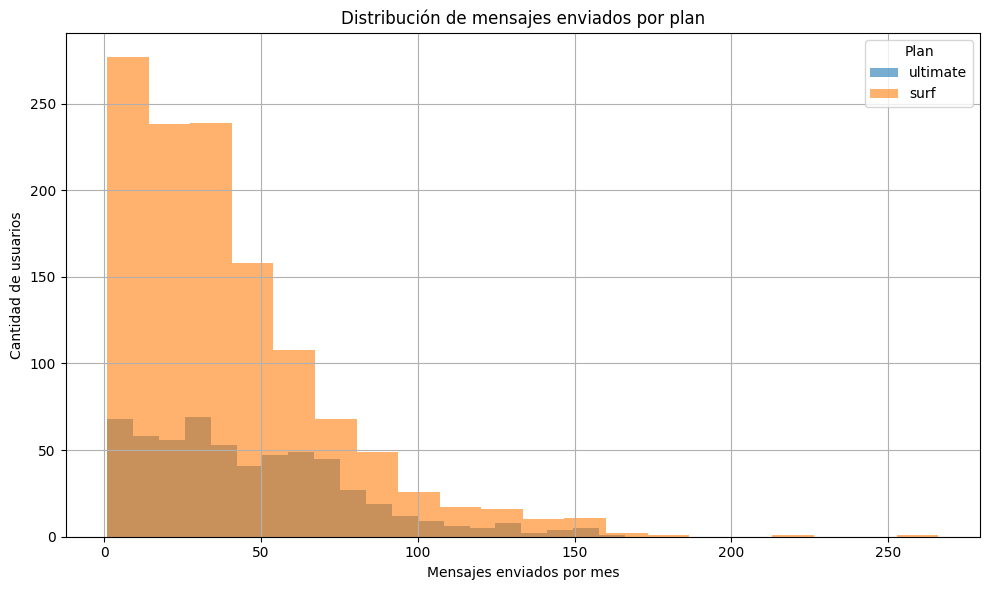

In [39]:
# Histograma en un solo gráfico
plt.figure(figsize=(10, 6))
for plan in usage_data['plan'].unique():
    subset = usage_data[usage_data['plan'] == plan]
    plt.hist(subset['messages sent'], bins=20, alpha=0.6, label=plan)

plt.title('Distribución de mensajes enviados por plan')
plt.xlabel('Mensajes enviados por mes')
plt.ylabel('Cantidad de usuarios')
plt.legend(title='Plan')
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
# Media y varianza
usage_data.groupby('plan')['messages sent'].agg(['mean', 'var'])

,mean,var
plan,,
surf,40.109656,1091.344231
ultimate,46.296233,1085.183108


<AxesSubplot:title={'center':'messages sent'}, xlabel='plan'>

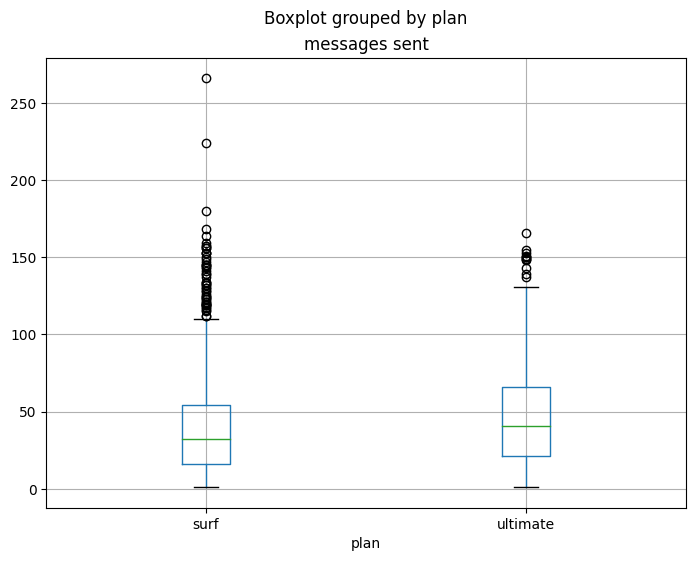

In [41]:
# Diagrama de caja
usage_data.boxplot(column='messages sent', by='plan', figsize=(8, 6))

Podemos observar que los mensajes, al igual que las llamadas se comportan de manera muy parecida en ambos planes, no obstante, vemos que de nueva cuenta, parece ser que los ususarios de surf exceden un poco su limite de mensajes, y los de ultimate desperdician su plan al utilizar una cantidad muy baja de msj en comparacion de todos los que pueden usar  

### Internet

In [42]:
# Media de GB usados por plan (redondeada)
mean_gb = usage_data.groupby('plan')['gb used'].mean().round()
print("Media de GB usados por plan (redondeada):")
print(mean_gb)

Media de GB usados por plan (redondeada):
plan
surf        17.0
ultimate    17.0
Name: gb used, dtype: float64


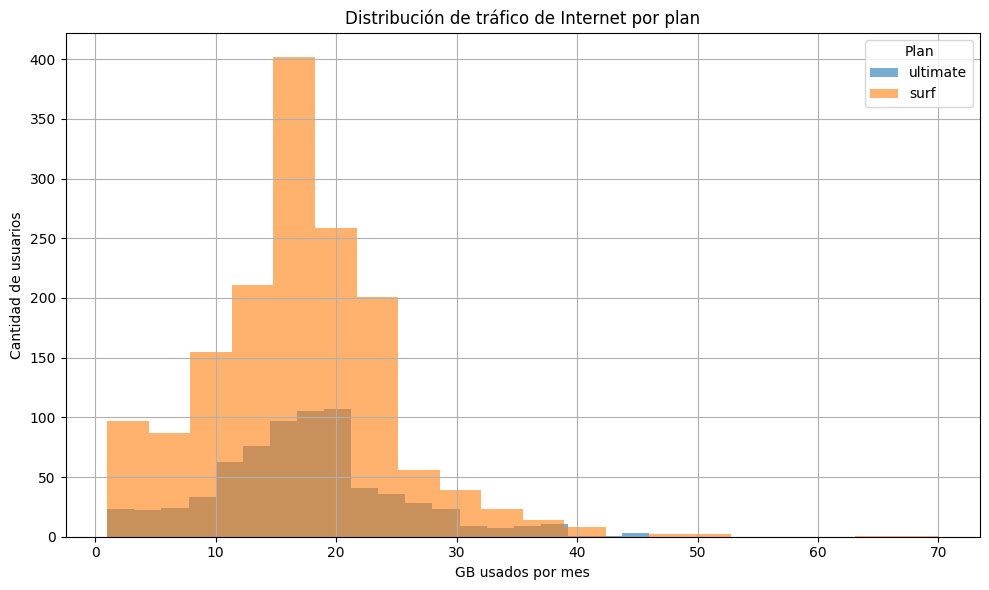

In [43]:
# Histograma en un solo gráfico
plt.figure(figsize=(10, 6))
for plan in usage_data['plan'].unique():
    subset = usage_data[usage_data['plan'] == plan]
    plt.hist(subset['gb used'], bins=20, alpha=0.6, label=plan)

plt.title('Distribución de tráfico de Internet por plan')
plt.xlabel('GB usados por mes')
plt.ylabel('Cantidad de usuarios')
plt.legend(title='Plan')
plt.grid(True)
plt.tight_layout()
plt.show()

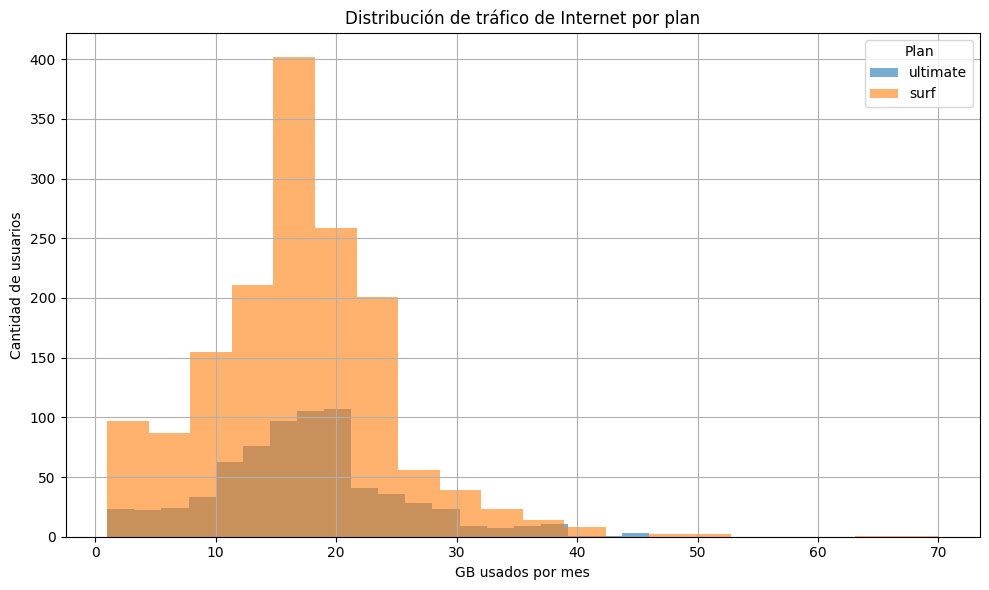

In [44]:
# Histograma en un solo gráfico
plt.figure(figsize=(10, 6))
for plan in usage_data['plan'].unique():
    subset = usage_data[usage_data['plan'] == plan]
    plt.hist(subset['gb used'], bins=20, alpha=0.6, label=plan)

plt.title('Distribución de tráfico de Internet por plan')
plt.xlabel('GB usados por mes')
plt.ylabel('Cantidad de usuarios')
plt.legend(title='Plan')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# Media, varianza y desviación estándar del tráfico de Internet por plan
internet_stats = usage_data.groupby('plan')['gb used'].agg(['mean', 'var']).round(2)

print("Estadísticas del tráfico de Internet mensual por plan (en GB):")
print(internet_stats)

Estadísticas del tráfico de Internet mensual por plan (en GB):
           mean    var
plan                  
surf      16.83  59.47
ultimate  17.33  58.49


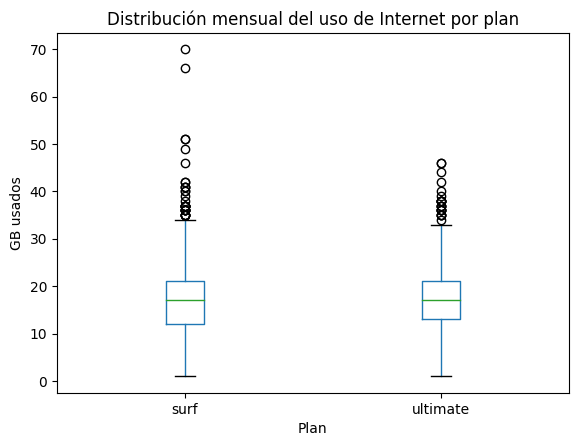

In [46]:
import matplotlib.pyplot as plt

# Diagrama de caja del tráfico de Internet mensual por plan
usage_data.boxplot(column='gb used', by='plan', grid=False)
plt.title('Distribución mensual del uso de Internet por plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('GB usados')
plt.show()


De nueva cuenta he observado el mismo patron que con las llamadas y mensajes, se comportan de manera sumamente parceida en cuanto a consumo, no obstante, los usuarios de surf, utilizan un poco mas que su limite de 15 GB y los usuarios de ultimate desperdician sus beneficios al utilizar menos de lo permitido. de igual manera, vemos segun el diagrama de caja que el plan de surf tiene mas datos atipicos

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [47]:
import matplotlib.pyplot as plt

# Agrupar por plan y calcular estadísticas básicas
revenue_stats = usage_data.groupby('plan')['total monthly revenue'].agg(['mean', 'var', 'std']).round(2)
print("Estadísticas de ingresos mensuales por plan:")
print(revenue_stats)

Estadísticas de ingresos mensuales por plan:
           mean      var    std
plan                           
surf      60.71  3067.84  55.39
ultimate  72.31   129.85  11.40


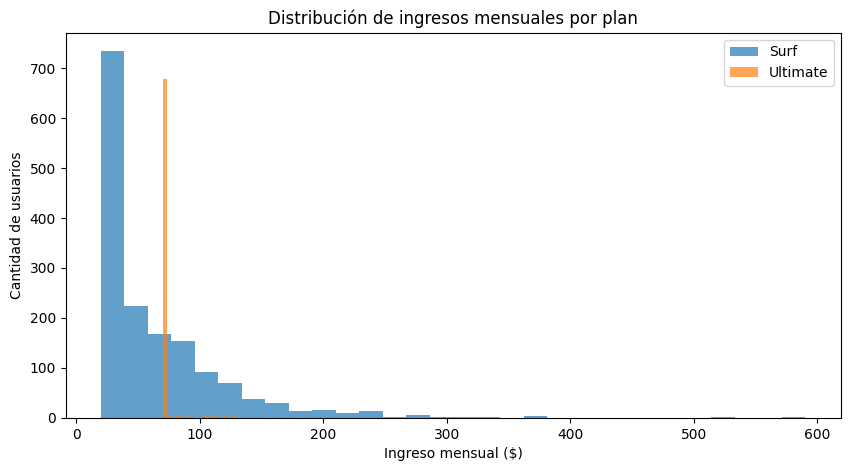

In [48]:
# Histograma de ingresos por plan
usage_data[usage_data['plan'] == 'surf']['total monthly revenue'].plot(
    kind='hist', bins=30, alpha=0.7, label='Surf', figsize=(10,5))
usage_data[usage_data['plan'] == 'ultimate']['total monthly revenue'].plot(
    kind='hist', bins=30, alpha=0.7, label='Ultimate')
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Ingreso mensual ($)')
plt.ylabel('Cantidad de usuarios')
plt.legend()
plt.show()

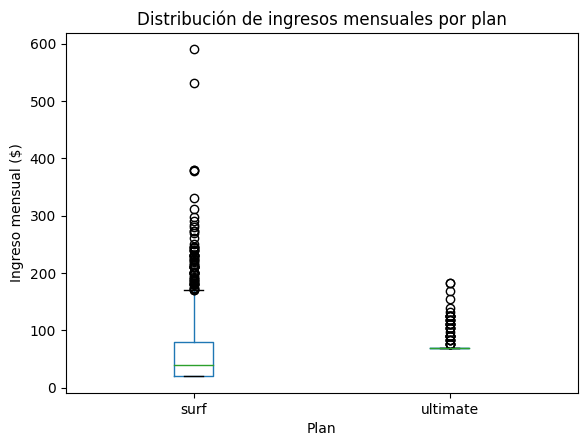

In [49]:
# Diagrama de caja
usage_data.boxplot(column='total monthly revenue', by='plan', grid=False)
plt.title('Distribución de ingresos mensuales por plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual ($)')
plt.show()

La parte del ingreso ha sido la mas compleja de analizar, pero, vemos que en promedio ambos planes reciben una cantidad muy parecida de ingreso a pesar de que la descripcion de las tarifas dice que sur son 20 dls y ultimate 70 dls. y segun el analisis que hemos hecho, en promedio los usuarios gastan 60 mesualmente en surf y 72 en ultimate. Teniendo en cuenta los analisis pasados, de nueva cuenta, vemos que hay 2 cosas que infiero, la primera es que losusuarios de surf se exceden de sus beneficios y los usuarios de ultimate desperdician sus beneficios; y la sengunda es que a pesar de todo y que los usuarios de surf se exceden de su paquete, parece ser que sigue siendo la mejor opcion teniendo en cuenta los patrones de consumo de los usuarios.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

Hipótesis nula (H₀):
No hay diferencia significativa en los ingresos promedio entre los planes Surf y Ultimate 


Hipótesis alternativa (H₁):
Hay una diferencia significativa en los ingresos promedio entre los dos planes.


Usaremos un valor estándar:
α=0.05

In [50]:
from scipy import stats

# Filtrar ingresos por plan
surf_revenue = usage_data[usage_data['plan'] == 'surf']['total monthly revenue']
ultimate_revenue = usage_data[usage_data['plan'] == 'ultimate']['total monthly revenue']

# Nivel de significancia
alpha = 0.05

# Prueba t para muestras independientes
t_stat, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Mostrar resultados con mejor formato
print(f'Valor p: {p_value:.4e}')  # Notación científica

# Conclusión con if
if p_value < alpha:
    print("\nConclusión: Rechazamos la hipótesis nula.")
    print("→ Hay una diferencia estadísticamente significativa entre los ingresos mensuales de los planes Surf y Ultimate.")
else:
    print("\nConclusión: No se puede rechazar la hipótesis nula.")
    print("→ No hay evidencia suficiente para afirmar que los ingresos de los planes sean diferentes.")



Valor p: 3.1704e-15

Conclusión: Rechazamos la hipótesis nula.
→ Hay una diferencia estadísticamente significativa entre los ingresos mensuales de los planes Surf y Ultimate.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

Hipótesis:

    Hipótesis nula (H₀): El ingreso promedio mensual de los usuarios del área NY-NJ es igual al de otras regiones.

    Hipótesis alternativa (H₁): El ingreso promedio mensual de los usuarios del área NY-NJ es diferente al de otras regiones.
   alpha = 0.05 

In [51]:
# Fusionar la columna 'city' al DataFrame usage_data
usage_data = usage_data.merge(users[['user id', 'city']], on='user id', how='left')


In [52]:
from scipy import stats

# Separar los ingresos por grupo
ny_nj_revenue = usage_data[usage_data['city'].str.contains('NY|NJ', regex=True)]['total monthly revenue']
other_revenue = usage_data[~usage_data['city'].str.contains('NY|NJ', regex=True)]['total monthly revenue']

# Prueba t
t_stat, p_value = stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

# Alfa
alpha = 0.05

# Resultado
print(f'Estadístico t: {t_stat:.2f}')
print(f'Valor p: {p_value:.4e}')

if p_value < alpha:
    print("\nConclusión: Rechazamos la hipótesis nula.")
    print("→ Hay una diferencia significativa entre los ingresos de NY/NJ y otras regiones.")
else:
    print("\nConclusión: No se puede rechazar la hipótesis nula.")
    print("→ No hay evidencia suficiente para afirmar que los ingresos sean diferentes.")


Estadístico t: -1.62
Valor p: 1.0667e-01

Conclusión: No se puede rechazar la hipótesis nula.
→ No hay evidencia suficiente para afirmar que los ingresos sean diferentes.


## Conclusión general
Conclusión final del análisis

Después de todo este análisis, puedo decir que, aunque las tarifas Surf y Ultimate están diseñadas para distintos perfiles de usuarios, en la práctica los patrones de consumo entre ambos grupos terminan siendo muy parecidos. A lo largo del proyecto hemos visto constantemente que:

    Los usuarios del plan Surf tienden a exceder sus beneficios, tanto en minutos, mensajes y datos. Esto genera cargos adicionales que elevan su gasto mensual por encima del pago base de $20, situándolo en un promedio de $60.71.

    Por otro lado, los usuarios del plan Ultimate, a pesar de pagar una tarifa fija de $70, no alcanzan a utilizar todos los beneficios incluidos (3000 minutos, 1000 mensajes y 30 GB). El gasto promedio real es de $72.31, lo que sugiere que muchos de ellos están pagando por más de lo que realmente necesitan.

Desde el punto de vista de comportamiento:

    La duración de llamadas mensuales en ambos planes se comporta de manera muy parecida, con un rango de uso que va de los 300 a 600 minutos en la mayoría de los casos. A pesar de que Surf solo ofrece 500 minutos, muchos usuarios sobrepasan ese límite y pagan extra, mientras que en Ultimate el límite de 3000 minutos queda ampliamente desaprovechado.

    Con los mensajes, el patrón se repite. Los usuarios de Surf se acercan o sobrepasan el límite de 50 mensajes, mientras que los de Ultimate no aprovechan sus 1000 mensajes. El comportamiento es similar, pero nuevamente el derroche de beneficios se da más en Ultimate.

    En cuanto al tráfico de Internet, se observó que los usuarios de Surf sí tienden a usar un poco más que sus 15 GB incluidos, mientras que en Ultimate, donde se ofrecen 30 GB, el uso suele quedarse muy por debajo. También se identificaron más valores atípicos en Surf, lo cual tiene sentido si se considera que esos usuarios a menudo sobrepasan sus límites.

Las pruebas estadísticas nos confirmaron todo esto:

    Sí existe una diferencia significativa entre los ingresos mensuales de los planes Surf y Ultimate.

    Pero no hay evidencia significativa de que el ingreso promedio de usuarios de la región NY-NJ sea diferente al del resto del país.

En resumen:

Podemos concluir que, aunque Ultimate parece más generoso sobre el papel, en la práctica los usuarios no suelen aprovechar completamente sus beneficios. En cambio, los usuarios de Surf sí utilizan intensamente su plan, aunque esto implique pagar cargos extra, y aún así su gasto promedio termina siendo inferior al de Ultimate. Esto nos hace pensar que Surf puede ser la mejor opción, al menos para el perfil de usuario que vemos en estos datos: alguien que consume con constancia, aunque sin llegar a los niveles extremos que permitirían sacarle todo el jugo a Ultimate.
